In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

from google.colab import files

In [ ]:
files.upload()

In [ ]:
df = pd.read_csv('SBER_daily.csv')
df2 = pd.read_csv('SBER_weekly.csv')
df3 = pd.read_csv('SBER_monthly.csv')
df.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,20220324,0,131.00,156.20,130.15,136.24,153705270
1,20220325,0,137.10,147.00,128.20,131.50,57307510
2,20220328,0,130.60,131.47,125.00,125.00,32756540
3,20220329,0,126.19,137.57,122.00,128.77,72242360
4,20220330,0,136.50,138.40,131.11,134.60,35411460


In [ ]:
df4 = pd.read_csv('BTC-monyhly.csv')
df5 = pd.read_csv('BTC-weekly.csv')
df6 = pd.read_csv('BTC-daily.csv')
df4.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-01,45554.164063,47313.476563,37697.941406,37714.875000,37714.875000,830115888649
1,2022-05-01,37713.265625,39902.949219,26350.490234,31792.310547,31792.310547,1105689315990
2,2022-06-01,31792.554688,31957.285156,17708.623047,19784.726563,19784.726563,923939211678
3,2022-07-01,19820.470703,24572.580078,18966.951172,23336.896484,23336.896484,927582363389
4,2022-08-01,23336.718750,25135.589844,19600.785156,20049.763672,20049.763672,894192654543


In [ ]:
df.describe() # общая статистика числовых данных

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
count,1.247000e+03,1247.0,1247.000000,1247.000000,1247.000000,1247.000000,1.247000e+03
mean,2.020199e+07,0.0,223.376175,226.153384,220.192678,223.245742,6.671605e+07
std,1.453979e+04,0.0,60.224416,60.467602,59.887462,60.191809,6.332550e+07
min,2.018030e+07,0.0,96.550000,106.770000,89.590000,101.500000,6.450540e+06
25%,2.019052e+07,0.0,189.980000,192.440000,186.520000,189.530000,3.819738e+07
50%,2.020082e+07,0.0,224.060000,226.880000,221.210000,223.500000,5.329676e+07
75%,2.021111e+07,0.0,260.025000,264.620000,257.100000,260.915000,7.649300e+07
max,2.023030e+07,0.0,385.900000,388.110000,376.720000,387.600000,1.084339e+09


In [ ]:
df.describe(include=['O']) # общая статистика нечисловых данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       366 non-null    float64
 2   High       366 non-null    float64
 3   Low        366 non-null    float64
 4   Close      366 non-null    float64
 5   Adj Close  366 non-null    float64
 6   Volume     366 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[['<DATE>',	'<TIME>',	'<OPEN>', '<CLOSE>',	'<HIGH>',	'<LOW>', '<VOL>']] = scaler.fit_transform(df[['<DATE>',	'<TIME>',	'<OPEN>', '<CLOSE>',	'<HIGH>',	'<LOW>', '<VOL>']])
df.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,0.00000,0.0,0.602834,0.605069,0.631456,0.606431,0.030142
1,0.00002,0.0,0.614654,0.599737,0.623307,0.599441,0.036700
2,0.00008,0.0,0.612234,0.611609,0.640511,0.613422,0.025643
3,0.00010,0.0,0.628823,0.621063,0.642357,0.603041,0.031635
4,0.00012,0.0,0.609781,0.604073,0.628844,0.602936,0.040358


<AxesSubplot:xlabel='<VOL>', ylabel='<CLOSE>'>

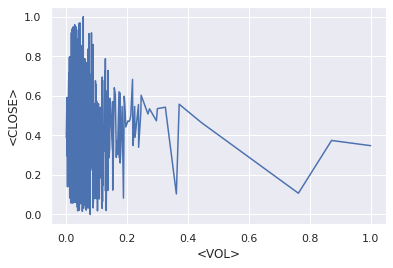

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
features = ['<DATE>',	'<TIME>',	'<OPEN>',	'<HIGH>',	'<LOW>', '<VOL>']
sns.lineplot(data=df, x='<VOL>', y='<CLOSE>')

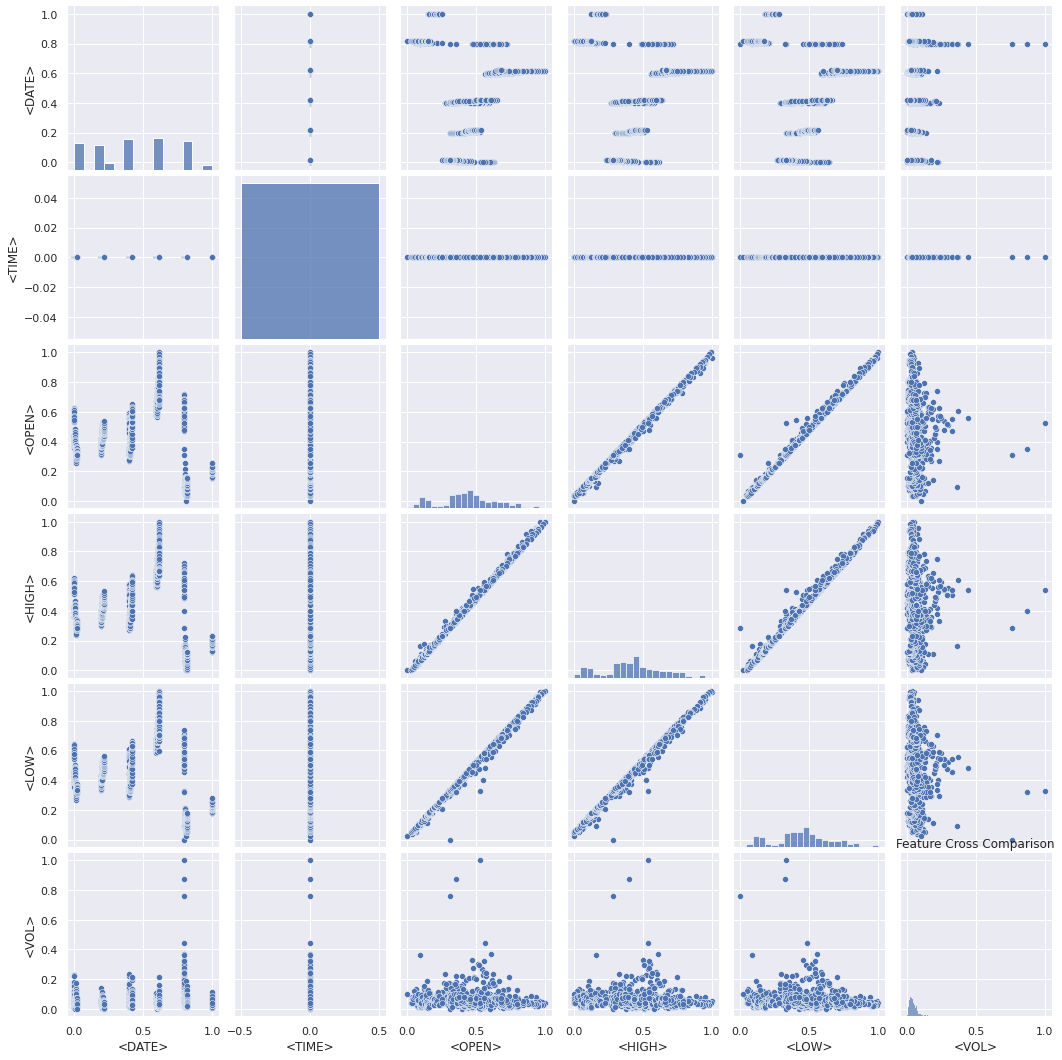

In [ ]:
features = ['<DATE>',	'<TIME>',	'<OPEN>',	'<HIGH>',	'<LOW>', '<VOL>']
target = '<CLOSE>'
# features = ['Date',	'Open',	'High',	'Low',	'Volume']
# target = 'Close'

sns.pairplot(df[features]) # Our dataset is too big to pairplot the whole thing.sample(5000)
plt.title("Feature Cross Comparison")
plt.show()

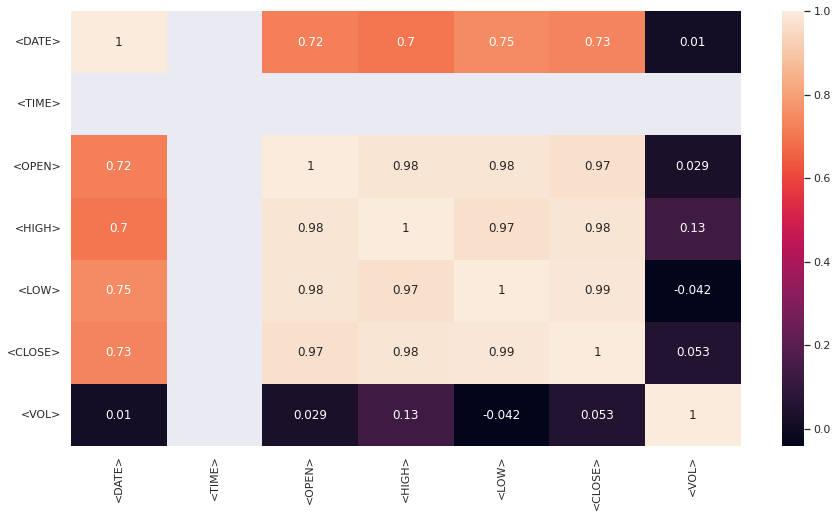

In [ ]:
sns.heatmap(df.corr(), annot=True) #значение коэффициента кореляции
plt.gcf().set_size_inches(15, 8)

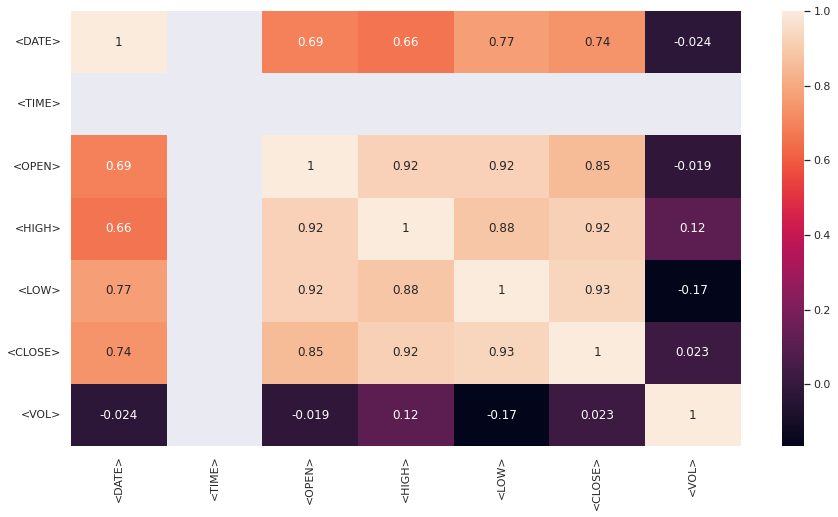

In [ ]:
sns.heatmap(df2.corr(), annot=True) #значение коэффициента кореляции
plt.gcf().set_size_inches(15, 8)

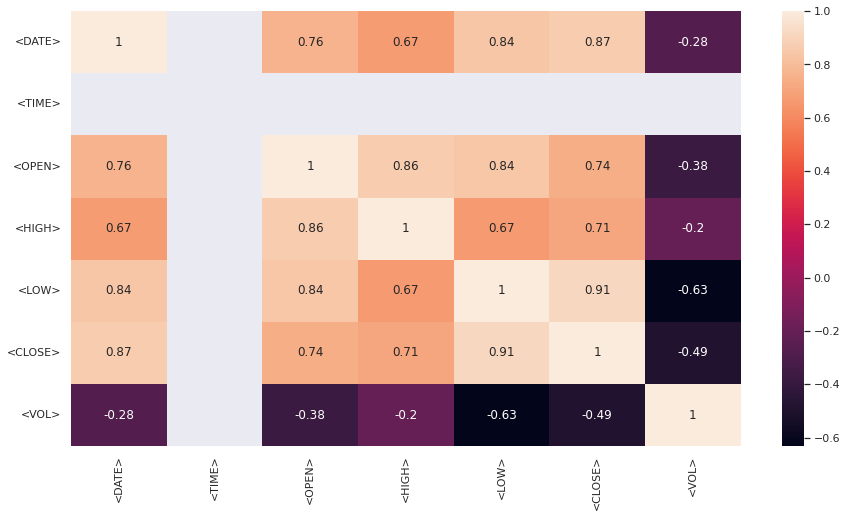

In [ ]:
sns.heatmap(df3.corr(), annot=True) #значение коэффициента кореляции
plt.gcf().set_size_inches(15, 8)

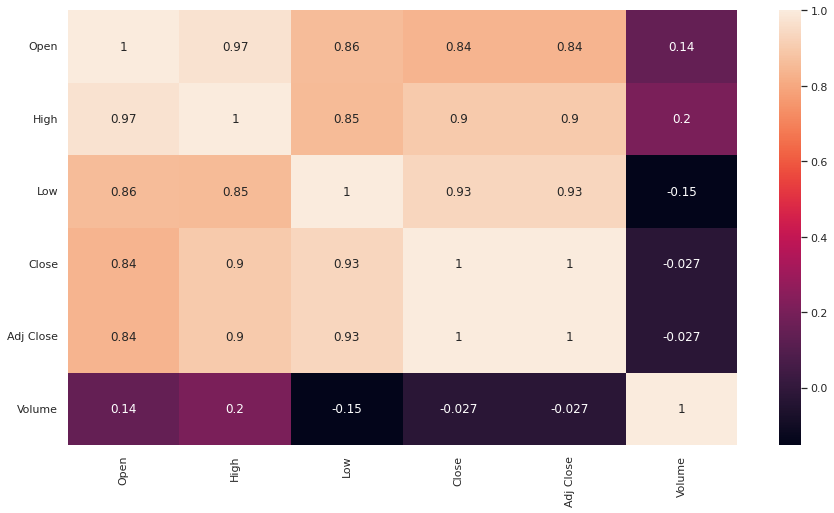

In [ ]:
sns.heatmap(df4.corr(), annot=True) #значение коэффициента кореляции
plt.gcf().set_size_inches(15, 8)

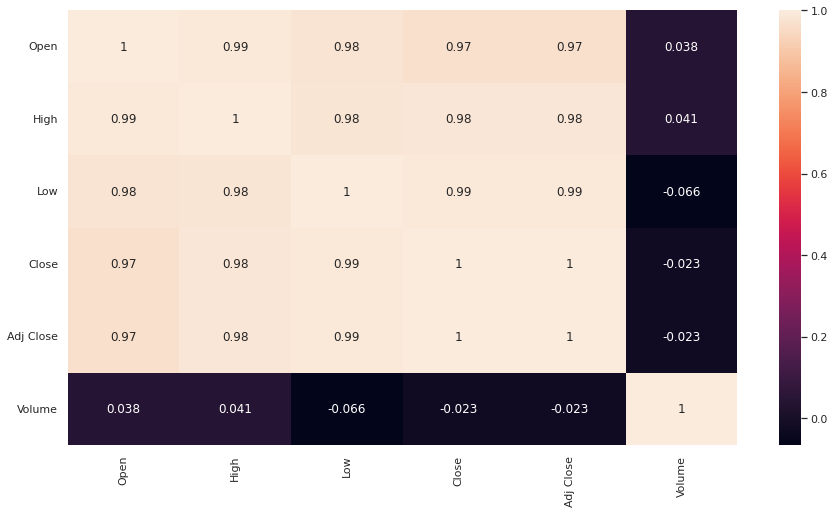

In [ ]:
sns.heatmap(df5.corr(), annot=True) #значение коэффициента кореляции
plt.gcf().set_size_inches(15, 8)

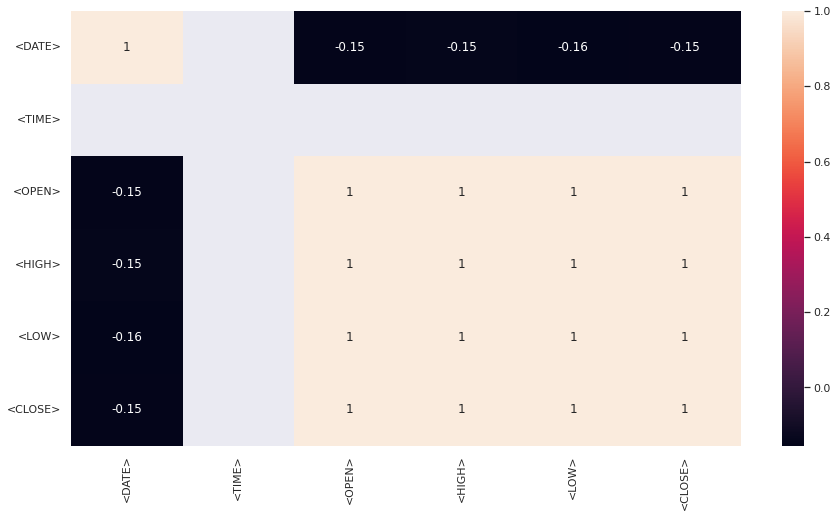

In [ ]:
sns.heatmap(df[features].corr(), annot=True)
plt.gcf().set_size_inches(15, 8)

In [ ]:
best_features = ['<DATE>', '<TIME>',	'<OPEN>',	'<HIGH>',	'<LOW>', '<VOL>']
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[features], df[target], test_size = 0.3, random_state=20)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([ 1.26918864e-04, -2.53446812e-09, -6.10941772e-01,  6.23531606e-01,
        9.42194987e-01,  8.38228965e-09])

In [ ]:
model.score(x_train, y_train)

0.9802681704856312

In [ ]:
model.score(x_test, y_test)

0.8499011079332335

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, model.predict(x_train))

4.54274093717962

In [ ]:
mean_squared_error(y_test, model.predict(x_test))

31.261863689702942